# SlopeLimiter

In [31]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import numpy as np

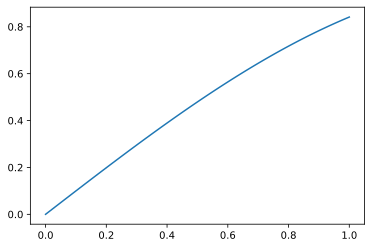

In [32]:
x=np.linspace(0,1,100)
plt.plot(x,np.sin(x))

In [38]:
vmm=1
vm=2
v=3
vp=4
vpp=5

# Polynomials
p0n = (2*vmm - 7*vm + 11*v)/6
p1n = ( -vm  + 5*v  + 2*vp)/6
p2n = (2*v   + 5*vp - vpp )/6

B0n = 13/12*(vmm-2*vm+v  )**2 + 1/4*(vmm-4*vm+3*v)**2
B1n = 13/12*(vm -2*v +vp )**2 + 1/4*(vm-vp)**2
B2n = 13/12*(v  -2*vp+vpp)**2 + 1/4*(3*v-4*vp+vpp)**2

# Constants
d0n = 1/10
d1n = 6/10
d2n = 3/10
epsilon = 1e-6

# Alpha weights 
alpha0n = d0n/(epsilon + B0n)**2
alpha1n = d1n/(epsilon + B1n)**2
alpha2n = d2n/(epsilon + B2n)**2
alphasumn = alpha0n + alpha1n + alpha2n

# ENO stencils weigths
w0n = alpha0n/alphasumn
w1n = alpha1n/alphasumn
w2n = alpha2n/alphasumn

# Numerical Flux at cell boundary, $u_{i+1/2}**{-}$;
hn = w0n*p0n + w1n*p1n + w2n*p2n
print(hn)

# %% Left Flux 
# % Choose the negative fluxes, 'u', to compute the left cell boundary flux:
# % $u_{i-1/2}**{+}$ 
umm = vmm
um  = vm
u=v
up  = vp
upp = vpp

# % Polynomials
p0p = ( -umm + 5*um + 2*u  )/6
p1p = ( 2*um + 5*u  - up   )/6
p2p = (11*u  - 7*up + 2*upp)/6

# % Smooth Indicators (Beta factors)
B0p = 13/12*(umm-2*um+u  )**2 + 1/4*(umm-4*um+3*u)**2;
B1p = 13/12*(um -2*u +up )**2 + 1/4*(um-up)**2;
B2p = 13/12*(u  -2*up+upp)**2 + 1/4*(3*u -4*up+upp)**2;

# % Constants
d0p = 3/10; 
d1p = 6/10; 
d2p = 1/10; 
epsilon = 1e-6;

# % Alpha weights 
alpha0p = d0p/(epsilon + B0p)**2;
alpha1p = d1p/(epsilon + B1p)**2;
alpha2p = d2p/(epsilon + B2p)**2;
alphasump = alpha0p + alpha1p + alpha2p;

# % ENO stencils weigths
w0p = alpha0p/alphasump;
w1p = alpha1p/alphasump;
w2p = alpha2p/alphasump;

# % Numerical Flux at cell boundary, $u_{i-1/2}**{+}$;
hp = w0p*p0p + w1p*p1p + w2p*p2p;

# %% Compute finite volume residual term, df/dx.
# res = (hp-circshift(hp,[0,1])+hn-circshift(hn,[0,1]))/dx - S(w);
hp

3.5


2.5000000000000004

In [36]:
def WENO5_JS(vmm,vm,vo,vp,vpp):
    # reconstruction as x_{j-1/2},x_{j+1/2}

    # Smooth Indicators (Beta factors)
    B0 = 13 / 12 * (vmm - 2 * vm + vo) ** 2 + 1 / 4 * (vmm - 4 * vm + 3 * vo) ** 2
    B1 = 13 / 12 * (vm - 2 * vo + vp) ** 2 + 1 / 4 * (vm - vp) ** 2
    B2 = 13 / 12 * (vo - 2 * vp + vpp) ** 2 + 1 / 4 * (3 * vo - 4 * vp + vpp) ** 2

    # Constants
    d0p = 3 / 10
    d1p = 6 / 10
    d2p = 1 / 10
    epsilon = 1e-6

    # Alpha weights
    alpha0p = d0p / (epsilon + B0) ** 2
    alpha1p = d1p / (epsilon + B1) ** 2
    alpha2p = d2p / (epsilon + B2) ** 2
    alphasump = alpha0p + alpha1p + alpha2p

    # ENO stencils weigths
    w0p = alpha0p / alphasump
    w1p = alpha1p / alphasump
    w2p = alpha2p / alphasump

    # Numerical Flux at cell boundary, $u_{i+1/2}^{+}$;
    fluxL = (
        w0p * (-vmm + 5 * vm + 2 * vo) / 6
        + w1p * (2 * vm + 5 * vo - vp) / 6
        + w2p * (11 * vo - 7 * vp + 2 * vpp) / 6
    )

    d0n = 1 / 10
    d1n = 6 / 10
    d2n = 3 / 10
    epsilon = 1e-6

    # Alpha weights
    alpha0n = d0n / (epsilon + B0) ** 2
    alpha1n = d1n / (epsilon + B1) ** 2
    alpha2n = d2n / (epsilon + B2) ** 2
    alphasumn = alpha0n + alpha1n + alpha2n

    # ENO stencils weigths
    w0n = alpha0n / alphasumn
    w1n = alpha1n / alphasumn
    w2n = alpha2n / alphasumn

    fluxR = (
        w0n * (2 * vmm - 7 * vm + 11 * vo) / 6
        + w1n * (-vm + 5 * vo + 2 * vp) / 6
        + w2n * (2 * vo + 5 * vp - vpp) / 6
    )
   
    return fluxL, fluxR
WENO5_JS(1,2,3,4,5)

(2.5000000000000004, 3.5)